# Case 2

* Attached to this test is a .csv file which contains data from `Comexstat`, which is basically the official data source for brazilian exports e imports, maintened by the government;

* The dataset contains all trackings of monthly imports and exports of a range of products (soybeans, soybean meal, soybean oil, corn, wheat and sugar), by brazilian states, by routes (air, sea, ground, etc) e from/to which country;

* We ask you to address a couple quentions below. Remember that data viz is one important skill to show besides any analytical skill. So we encourage you to use and explore a bunch of graphs and tables to show your point.

---

Chamando os pacotes...

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Criando o dataframe `df` para ler o arquivo solicitado:

In [107]:
df = pd.read_csv("data_comexstat.csv", encoding = 'Latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117965 entries, 0 to 117964
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   date     117965 non-null  object 
 1   product  117965 non-null  object 
 2   state    117965 non-null  object 
 3   country  117965 non-null  object 
 4   type     117965 non-null  object 
 5   route    117965 non-null  object 
 6   tons     117965 non-null  float64
 7   usd      117965 non-null  float64
dtypes: float64(2), object(6)
memory usage: 7.2+ MB


Temos aqui então um arquivo com 8 colunas e 117965 linhas. Interessante notar que a primeira coluna (**dates**) está no formato *object*. Sendo assim, é interessante convertê-la para o formato *datetime*, pois isso pode ser útil no futuro.

In [108]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117965 entries, 0 to 117964
Data columns (total 8 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     117965 non-null  datetime64[ns]
 1   product  117965 non-null  object        
 2   state    117965 non-null  object        
 3   country  117965 non-null  object        
 4   type     117965 non-null  object        
 5   route    117965 non-null  object        
 6   tons     117965 non-null  float64       
 7   usd      117965 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 7.2+ MB


### 1.
Show the evolution of total monthly and total annual exports from Brazil (all states and to everywhere) of ‘soybeans’, ‘soybean oil’ and ‘soybean meal’.

---

Primeiramente, criaremos um novo *dataframe* chamado `exports`, que conterá os dados do dataframe original (df) filtrados apenas pelas exportações.

In [109]:
exports = df[df['type'] == 'Export']
exports

,date,product,state,country,type,route,tons,usd
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
5,1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0
9,1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0
10,1997-01-01,corn,PR,Paraguay,Export,Ground,258.300,386733.0
...,...,...,...,...,...,...,...,...
117952,2019-12-01,wheat,PR,United States,Export,Sea,0.400,400.0
117957,2019-12-01,wheat,RS,Vietnam,Export,Sea,36698.000,6963002.0
117961,2019-12-01,wheat,SP,Ireland,Export,Sea,0.500,477.0
117963,2019-12-01,wheat,SP,Liberia,Export,Other,0.025,50.0


Agora, vamos filtrar o dataframe anterior apenas pelos produtos desejados (soybeans, soybean oil e soybean meal), criando um novo dataframe chamado `exports_soybean`:

In [110]:
exports_soybean = exports[(exports['product'] == 'soybeans') | (exports['product'] == 'soybean_oil') |
                          (exports['product'] == 'soybean_meal')]
exports_soybean

,date,product,state,country,type,route,tons,usd
19,1997-01-01,soybean_meal,GO,Netherlands,Export,Sea,419.070,119318.0
20,1997-01-01,soybean_meal,GO,Netherlands,Export,Sea,5000.000,1414250.0
21,1997-01-01,soybean_meal,MS,Germany,Export,Sea,140.672,38378.0
22,1997-01-01,soybean_meal,MS,Hungary,Export,Sea,15000.000,4042100.0
23,1997-01-01,soybean_meal,MS,Netherlands,Export,Sea,14000.000,3850162.0
...,...,...,...,...,...,...,...,...
117584,2019-12-01,soybeans,SP,Liberia,Export,Other,0.004,11.0
117585,2019-12-01,soybeans,SP,Liberia,Export,Other,0.006,30.0
117586,2019-12-01,soybeans,SP,Thailand,Export,Sea,146.499,52813.0
117587,2019-12-01,soybeans,TO,China,Export,Sea,63731.482,22986541.0


Agora, um novo dataframe será criado a partir do anterior **agrupando** os dados por ano e fazendo uma **soma** nos valores. 

In [111]:
exports_soybeans_anual = exports_soybean.groupby(exports_soybean.date.dt.year).sum()
exports_soybeans_anual

,tons,usd
date,,
1997,1.927842e+07,5.667909e+09
1998,1.992745e+07,4.498817e+09
1999,1.964763e+07,3.562014e+09
2000,2.084151e+07,3.986394e+09
2001,2.661016e+07,4.929199e+09
2002,2.852106e+07,5.643658e+09
2003,3.378552e+07,7.631892e+09
2004,3.339284e+07,9.299662e+09
2005,3.905923e+07,9.360991e+09


Finalmente, plotando o gráfico:

Text(0.5, 1.0, 'Soybean exports from Brazil (US$)')

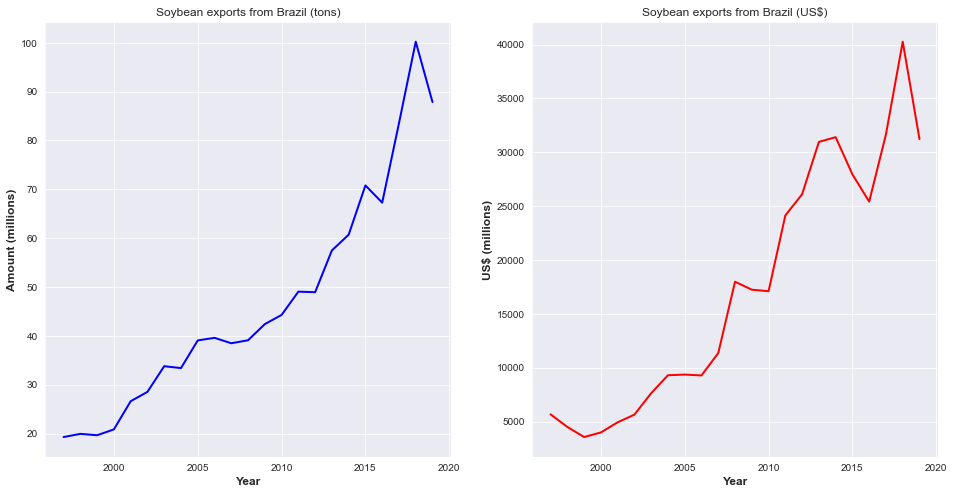

In [112]:
sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(exports_soybeans_anual['tons']/(10**6), '-', color = 'blue', linewidth = 2.0, label = 'Tons')
plt.xlabel('Year', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions)', fontweight = 'bold', fontsize = 12.0)
plt.title('Soybean exports from Brazil (tons)')

plt.subplot(1,2,2)
plt.plot(exports_soybeans_anual['usd']/(10**6), '-', color = 'red', linewidth = 2.0, label = 'US$')
plt.xlabel('Year', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('US$ (millions)', fontweight = 'bold', fontsize = 12.0)
plt.title('Soybean exports from Brazil (US$)')

Agora, precisamos mostrar a evolução **mês a mês** das exportações. Bom, para isso, podemos primeiro filtrar o dataframe `exports_soybean` por **período** (mês) e somar.

In [113]:
exports_soybeans_month = exports_soybean.groupby(exports_soybean['date'].dt.to_period('M')).sum()
exports_soybeans_month

,tons,usd
date,,
1997-01,567720.932,1.720748e+08
1997-02,228191.694,7.083836e+07
1997-03,1147309.595,3.205430e+08
1997-04,2959179.194,8.686875e+08
1997-05,3069444.243,9.135208e+08
...,...,...
2019-08,6088796.526,2.171754e+09
2019-09,5833563.071,2.060158e+09
2019-10,6192962.795,2.226889e+09


Notemos que o dataframe criado contém como índice o ano e o mês, respectivamente. Podemos criar uma coluna agora para acessar os anos relativos à cada uma das linhas.

In [114]:
exports_soybeans_month['year'] = pd.PeriodIndex(exports_soybeans_month.index).year
exports_soybeans_month['month'] = pd.PeriodIndex(exports_soybeans_month.index).month
exports_soybeans_month

,tons,usd,year,month
date,,,,
1997-01,567720.932,1.720748e+08,1997,1
1997-02,228191.694,7.083836e+07,1997,2
1997-03,1147309.595,3.205430e+08,1997,3
1997-04,2959179.194,8.686875e+08,1997,4
1997-05,3069444.243,9.135208e+08,1997,5
...,...,...,...,...
2019-08,6088796.526,2.171754e+09,2019,8
2019-09,5833563.071,2.060158e+09,2019,9
2019-10,6192962.795,2.226889e+09,2019,10


O que podemos fazer agora é plotar os gráficos para visualizar os dados mês a mês, para cada ano. Como são 12 meses e mais de 20 entradas de anos, vamos dividir os gráficos por semestre para melhorar a visualização.

Text(0.5, 1.0, 'Soybean exports from Brazil (tons) - First semester')

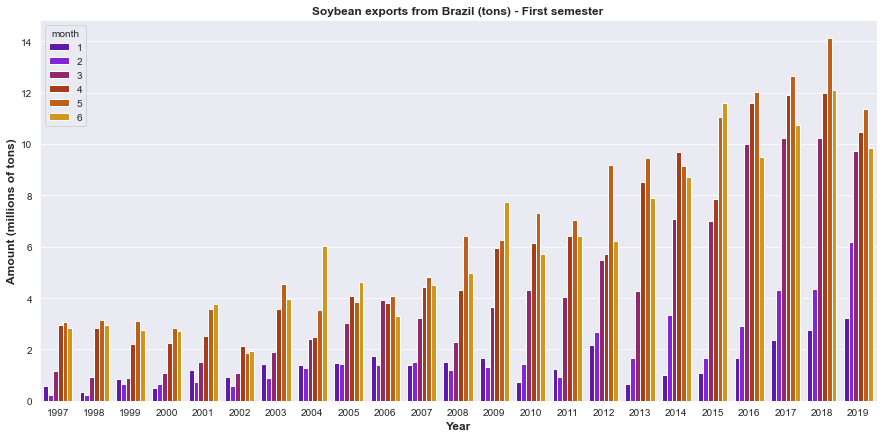

In [115]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = pd.PeriodIndex(exports_soybeans_month.index).year, y = exports_soybeans_month['tons']/(10**6), 
             data = exports_soybeans_month, hue = 'month', hue_order = np.arange(1,7), palette='gnuplot')
plt.xlabel('Year', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Soybean exports from Brazil (tons) - First semester', fontweight = 'bold')

Text(0.5, 1.0, 'Soybean exports from Brazil (tons) - Second semester')

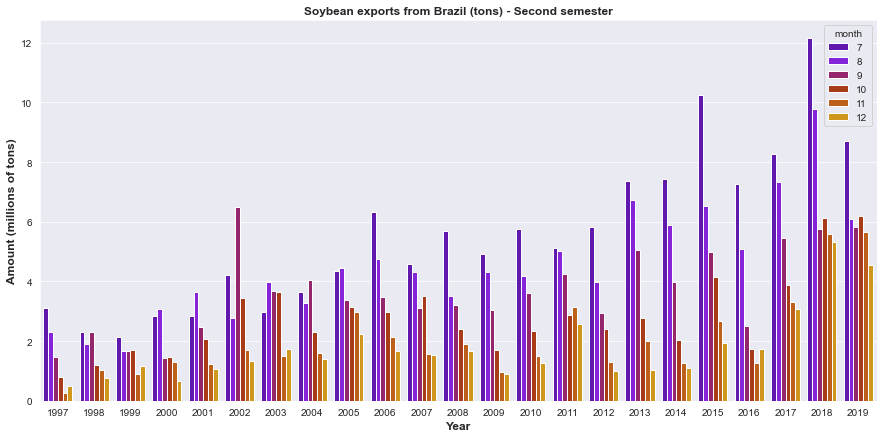

In [116]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = pd.PeriodIndex(exports_soybeans_month.index).year, y = exports_soybeans_month['tons']/(10**6), 
             data = exports_soybeans_month, hue = 'month', hue_order = np.arange(7,13), palette='gnuplot')
plt.xlabel('Year', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Soybean exports from Brazil (tons) - Second semester', fontweight = 'bold')

Agora, para o valor (em US$) arrecadado pelas vendas:

Text(0.5, 1.0, 'Soybean exports from Brazil (tons) - First semester')

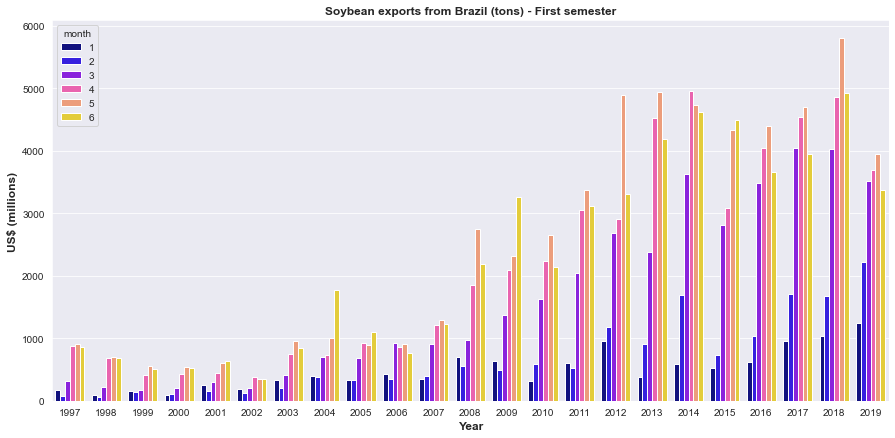

In [117]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = pd.PeriodIndex(exports_soybeans_month.index).year, y = exports_soybeans_month['usd']/(10**6), 
             data = exports_soybeans_month, hue = 'month', hue_order = np.arange(1,7), palette='gnuplot2')
plt.xlabel('Year', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('US$ (millions)', fontweight = 'bold', fontsize = 12.0)
plt.title('Soybean exports from Brazil (tons) - First semester', fontweight = 'bold')

Text(0.5, 1.0, 'Soybean exports from Brazil (tons) - Second semester')

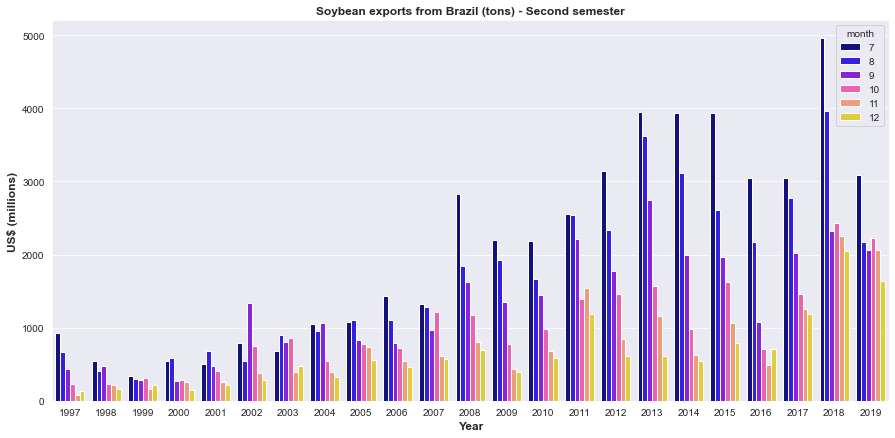

In [118]:
plt.figure(figsize=(15,7))
ax = sns.barplot(x = pd.PeriodIndex(exports_soybeans_month.index).year, y = exports_soybeans_month['usd']/(10**6), 
             data = exports_soybeans_month, hue = 'month', hue_order = np.arange(7,13), palette='gnuplot2')
plt.xlabel('Year', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('US$ (millions)', fontweight = 'bold', fontsize = 12.0)
plt.title('Soybean exports from Brazil (tons) - Second semester', fontweight = 'bold')

Interessante notar como os meses de **Maio, Junho** e **Julho** são os meses que o Brasill vende mais soja (nas suas mais variadas formas) para o mercado exterior. Segundo a [EMBRAPA](https://www.agencia.cnptia.embrapa.br/gestor/soja/arvore/CONT000fv6nbpq002wx5eo0c9slrah3apwqs.html), os melhores meses de semeadura da soja são entre Outubro e Dezembro. Considerando o tempo de plantio até a colheita, é de se esperar que os meses de colheita para venda sejam realmente entre Maio e Julho.

### 2.

What are the 3 most important products exported by Brazil in the last 5 years?

---

O enunciado pede que se obtenha os 3 produtos mais exportados nos últimos cinco anos. A solução que proponho aqui é:

* Criar uma coluna `year` para o dataframe `exports` para acessar o ano de cada uma das exportações;

* Plotar um *barplot* da quantidade vendida por ano, separada por tipo de produto, selecionando os cinco últimos anos como `hue` e usando `estimator = sum`.

In [119]:
exports['year'] = exports['date'].dt.year
exports

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,product,state,country,type,route,tons,usd,year
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997
5,1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0,1997
9,1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0,1997
10,1997-01-01,corn,PR,Paraguay,Export,Ground,258.300,386733.0,1997
...,...,...,...,...,...,...,...,...,...
117952,2019-12-01,wheat,PR,United States,Export,Sea,0.400,400.0,2019
117957,2019-12-01,wheat,RS,Vietnam,Export,Sea,36698.000,6963002.0,2019
117961,2019-12-01,wheat,SP,Ireland,Export,Sea,0.500,477.0,2019
117963,2019-12-01,wheat,SP,Liberia,Export,Other,0.025,50.0,2019


Text(0.5, 1.0, 'Brazil products exports')

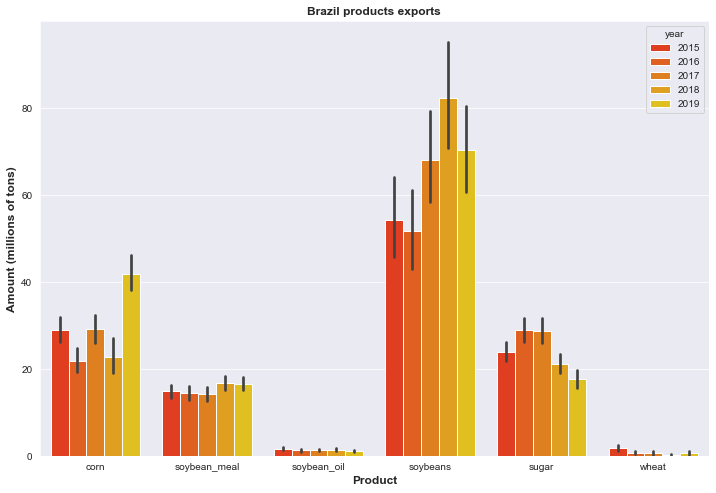

In [120]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'product', y = exports['tons']/(10**6), data = exports, estimator = sum, hue = 'year',
           hue_order = np.arange(2015,2020), palette='autumn')
plt.xlabel('Product', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Brazil products exports', fontweight = 'bold')

Portanto, pelo gráfico anterior, concluímos que os 3 produtos mais importantes nas exportações brasileiras nos últimos cinco anos foram **grãos de soja**, **milho** e **açúcar**.

### 3.

What are the main routes through which Brazil have been exporting ‘corn’ in the last few years? Are there differences in the relative importancem of routes depending on the product?

---

Para responder essa questão, faremos a seguinte sequência:

* Criar um dataframe filtrando o dataframe `exports` somente para os produtos `corn`;

* Plotar um *barplot* da quantidade vendida por ano, separada por rota, selecionando os cinco últimos anos como `hue` e usando `estimator = sum`.

In [121]:
exports_corn = exports[exports['product'] == 'corn']
exports_corn

,date,product,state,country,type,route,tons,usd,year
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997
5,1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0,1997
9,1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0,1997
10,1997-01-01,corn,PR,Paraguay,Export,Ground,258.300,386733.0,1997
...,...,...,...,...,...,...,...,...,...
117265,2019-12-01,corn,SP,Vietnam,Export,Sea,2575.793,402284.0,2019
117266,2019-12-01,corn,TO,Egypt,Export,Sea,27908.815,4433950.0,2019
117267,2019-12-01,corn,TO,Kuwait,Export,Sea,1293.930,229003.0,2019
117268,2019-12-01,corn,TO,Philippines,Export,Air,0.007,27.0,2019


Text(0.5, 1.0, 'Brazil corn exports per route')

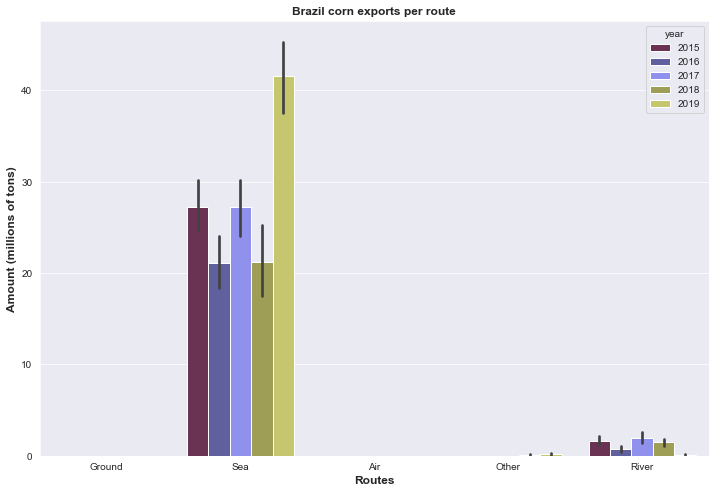

In [122]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'route', y = exports_corn['tons']/(10**6), data = exports_corn, hue = 'year',
           estimator = sum, hue_order = np.arange(2015,2020), palette='gist_stern')
plt.xlabel('Routes', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Brazil corn exports per route', fontweight = 'bold')

Assim, concluímos que, em relação à exportação de **milho**, as principais rotas utilizadas são as **hidroviárias (mar e rios)**.

Para saber a importância das rotas para **todos** os produtos, fixaremos um ano e faremos:

* Criar um dataframe separando as exportações pelo ano desejado (a título de comparação, utilizaremos o primeiro e último anos da série (1997 e 2019);
* Plotar um *barplot* da quantidade vendida por ano, separada por tipo de produto, selecionando as rotas como `hue` e usando `estimator = sum`.

In [123]:
exports_2019 = exports[exports['year'] == 2019]
exports_2019

,date,product,state,country,type,route,tons,usd,year
106365,2019-01-01,corn,AC,Peru,Export,Ground,739.200,158823.0,2019
106366,2019-01-01,corn,AC,Peru,Export,Other,32.000,7585.0,2019
106367,2019-01-01,corn,AM,Guyana,Export,Ground,0.100,138.0,2019
106368,2019-01-01,corn,BA,Liberia,Export,Other,0.024,16.0,2019
106369,2019-01-01,corn,ES,China,Export,Other,0.002,1.0,2019
...,...,...,...,...,...,...,...,...,...
117952,2019-12-01,wheat,PR,United States,Export,Sea,0.400,400.0,2019
117957,2019-12-01,wheat,RS,Vietnam,Export,Sea,36698.000,6963002.0,2019
117961,2019-12-01,wheat,SP,Ireland,Export,Sea,0.500,477.0,2019
117963,2019-12-01,wheat,SP,Liberia,Export,Other,0.025,50.0,2019


Text(0.5, 1.0, 'Brazil exports per route - 2019')

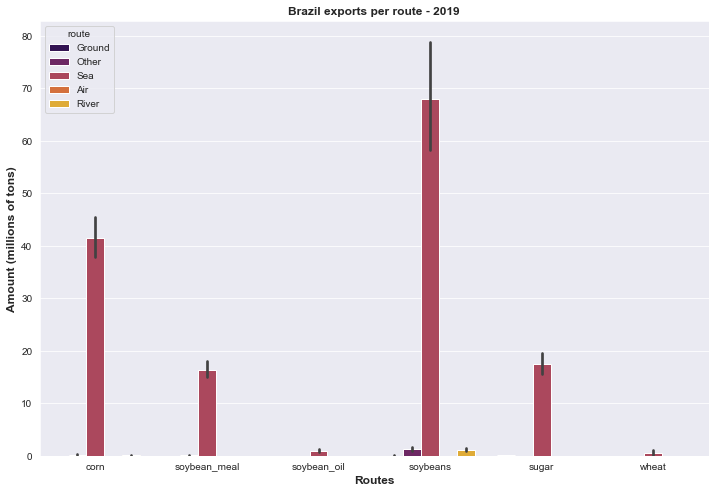

In [124]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'product', y = exports_2019['tons']/(10**6), data = exports_2019, hue = 'route',
           estimator = sum, palette='inferno')
plt.xlabel('Routes', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Brazil exports per route - 2019', fontweight = 'bold')

Agora, fazendo o mesmo raciocínio para o ano de 1997, para ver se houve alguma mudança significativa:

In [125]:
exports_1997 = exports[exports['year'] == 1997]
exports_1997

,date,product,state,country,type,route,tons,usd,year
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997
5,1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0,1997
9,1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0,1997
10,1997-01-01,corn,PR,Paraguay,Export,Ground,258.300,386733.0,1997
...,...,...,...,...,...,...,...,...,...
2062,1997-12-01,sugar,SP,Nigeria,Export,Sea,1500.000,436500.0,1997
2063,1997-12-01,sugar,SP,Nigeria,Export,Sea,5500.000,1705000.0,1997
2064,1997-12-01,sugar,SP,Somalia,Export,Sea,7000.000,2042460.0,1997
2066,1997-12-01,sugar,SP,Uruguay,Export,Ground,275.000,82125.0,1997


Text(0.5, 1.0, 'Brazil exports per route - 1997')

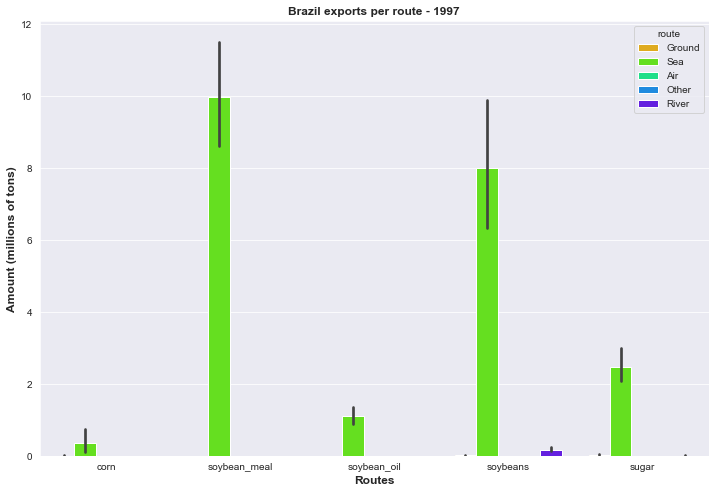

In [126]:
plt.figure(figsize=(12,8))
sns.barplot(x = 'product', y = exports_1997['tons']/(10**6), data = exports_1997, hue = 'route',
           estimator = sum, palette='gist_rainbow')
plt.xlabel('Routes', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Brazil exports per route - 1997', fontweight = 'bold')

Os dois gráficos anteriores mostram que não houve mudança no tipo de rota escolhida pelo Brasil para suas exportações. Nesse sentido, o transporte hidroviário sempre foi dominante nas nossas exportações, sendo as exportações por navios (mar) muito mais expressiva.

Esse resultado já era esperado, pois os maiores compradores de grãos do Brasil são países da Ásia e da América do Norte, sendo então a rota marítima a melhor via para as exportações.

### 4.

Which countries have been the most important trade partners for Brazil in terms of ‘corn’ and ‘sugar’ in the last 3 years?

---

A questão pede para que determinemos os maiores parceiros comerciais do Brasil em relação aos produtos **milho** e **açúcar**. Para isso, precisamos analisar todas as operações comerciais, sejam elas de importação ou de exportação. Os países mais presentes nessas operações serão os maiores parceiros comerciais brasileiros.

Para isso, usaremos o dataframe original `df` e faremos algumas operações com ele. São elas:

* Filtrar o dataframe apenas por *corn*;

In [127]:
corn = df[df['product'] == 'corn']
corn

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0
...,...,...,...,...,...,...,...,...
117265,2019-12-01,corn,SP,Vietnam,Export,Sea,2575.793,402284.0
117266,2019-12-01,corn,TO,Egypt,Export,Sea,27908.815,4433950.0
117267,2019-12-01,corn,TO,Kuwait,Export,Sea,1293.930,229003.0
117268,2019-12-01,corn,TO,Philippines,Export,Air,0.007,27.0


Adicionando uma coluna `year` no dataframe anterior:

In [128]:
corn['year'] = corn['date'].dt.year
corn

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,product,state,country,type,route,tons,usd,year
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0,1997
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0,1997
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0,1997
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0,1997
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0,1997
...,...,...,...,...,...,...,...,...,...
117265,2019-12-01,corn,SP,Vietnam,Export,Sea,2575.793,402284.0,2019
117266,2019-12-01,corn,TO,Egypt,Export,Sea,27908.815,4433950.0,2019
117267,2019-12-01,corn,TO,Kuwait,Export,Sea,1293.930,229003.0,2019
117268,2019-12-01,corn,TO,Philippines,Export,Air,0.007,27.0,2019


O procedimento agora será o seguinte:

* Criar um novo dataframe (`corn_last3years`), filtrando os dados do dataframe `corn` para os anos de 2019, 2018 e 2017;

* Agrupar o dataframe `corn_last3years` por país, **somando** o total em cada coluna e, posteriormente, separando apenas para os 10 maiores valores (ou seja, 10 maiores parceiros comerciais para o Brasil em relação ao milho nos anos de 2017 - 2019);

* Plotar o barplot correspondente

In [129]:
corn_last3years = corn[(corn['year']==2019) | (corn['year']==2018) | (corn['year']==2017)]
corn_last3years = corn_last3years.groupby(by='country').sum().nlargest(10, 'tons')
corn_last3years

,tons,usd,year
country,,,
Iran,1.642565e+07,2.822336e+09,716455
Japan,9.676921e+06,1.574976e+09,510622
Vietnam,9.446982e+06,1.551035e+09,419763
Egypt,8.353797e+06,1.375065e+09,569091
Spain,8.243946e+06,1.335780e+09,540842
South Korea,6.273068e+06,1.024568e+09,341081
Taiwan,5.059363e+06,8.155653e+08,306761
Malaysia,4.238332e+06,6.963335e+08,330986
Bangladesh,3.228436e+06,5.278790e+08,290599


Text(0.5, 1.0, 'Top 10 Brazil trade partners - corn (2017 - 2019)')

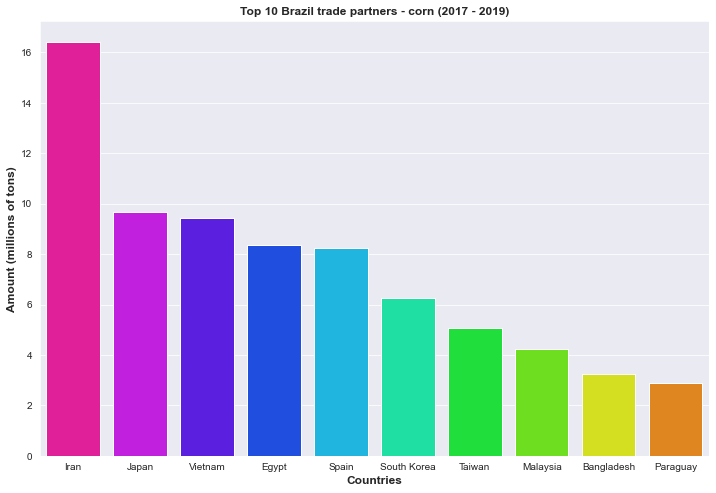

In [130]:
plt.figure(figsize=(12,8))
sns.barplot(x = corn_last3years.index, y = corn_last3years['tons']/(10**6), data = corn_last3years, palette='hsv_r')
plt.xlabel('Countries', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Top 10 Brazil trade partners - corn (2017 - 2019)', fontweight = 'bold')

Fazendo o mesmo procedimento anterior, agora para o açúcar:

In [131]:
sugar = df[df['product'] == 'sugar']
sugar['year'] = sugar['date'].dt.year

sugar_last3years = sugar[(sugar['year']==2019) | (sugar['year']==2018) | (sugar['year']==2017)]
sugar_last3years = sugar_last3years.groupby(by='country').sum().nlargest(10, 'tons')
sugar_last3years

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,tons,usd,year
country,,,
Algeria,6696854.262,2.176381e+09,413684
Bangladesh,6331640.155,2.063175e+09,300672
India,5111371.882,1.696095e+09,284519
United Arab Emirates,4545802.219,1.538398e+09,318818
Saudi Arabia,4249461.903,1.380456e+09,347083
Nigeria,4156814.026,1.336515e+09,276465
Iraq,3555241.197,1.158541e+09,338999
Egypt,3071223.738,1.010584e+09,238094
Malaysia,2981729.159,1.039031e+09,270362


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

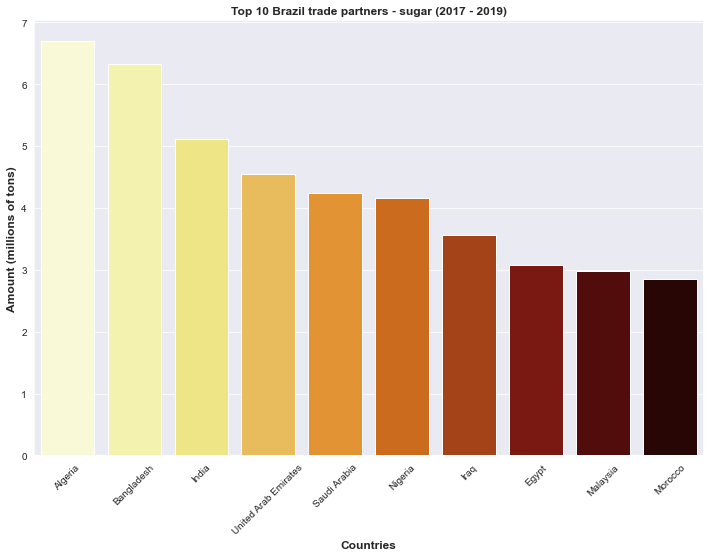

In [132]:
plt.figure(figsize=(12,8))
sns.barplot(x = sugar_last3years.index, y = sugar_last3years['tons']/(10**6), data = sugar_last3years, palette='afmhot_r')
plt.xlabel('Countries', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Top 10 Brazil trade partners - sugar (2017 - 2019)', fontweight = 'bold')
plt.xticks(rotation = 45) #Apenas para rodar as labels dos países para não ficar uma por cima da outra.

### 5.

For each of the products in the dataset, show the 5 most important states in terms of exports?

---

A abordagem aqui será a seguinte:

* A partir do dataframe `exports` criado anteriormente, vamos criar outros dataframes passando um filtro no tipo de produto desejado;

* Agrupar cada um dos dataframes criado por *estado*;

* Ordenar por ordem crescente e plotar os cinco maiores (em termos de toneladas exportadas).

In [133]:
exports_corn = exports[exports['product']=='corn']
exports_sugar = exports[exports['product']=='sugar']
exports_soybean_meal = exports[exports['product']=='soybean_meal']
exports_soybean_oil = exports[exports['product']=='soybean_oil']
exports_soybeans = exports[exports['product']=='soybeans']
exports_wheat = exports[exports['product']=='wheat']

O procedimento agora é agrupar por estado (`.groupby(by='state')`), somar os valores (`.sum()`) e ordenar apenas os cinco maiores da coluna `tons` (`.nlargest(5,'tons')`)

In [134]:
exports_corn = exports_corn.groupby(by='state').sum().nlargest(5,'tons')
exports_corn

,tons,usd,year
state,,,
MT,1.518234e+08,2.837552e+10,8836441
PR,5.386247e+07,9.160512e+09,5456965
GO,2.846462e+07,5.706991e+09,5320920
MS,1.827060e+07,3.405431e+09,3200806
SP,7.343888e+06,1.511122e+09,4259558


Fazendo isso para os outros dataframes:

In [135]:
exports_sugar = exports_sugar.groupby(by='state').sum().nlargest(5,'tons')
exports_soybean_meal = exports_soybean_meal.groupby(by='state').sum().nlargest(5,'tons')
exports_soybean_oil = exports_soybean_oil.groupby(by='state').sum().nlargest(5,'tons')
exports_soybeans = exports_soybeans.groupby(by='state').sum().nlargest(5,'tons')
exports_wheat = exports_wheat.groupby(by='state').sum().nlargest(5,'tons')

Hora de plotar os resultados:

Text(0.5, 1.0, 'Wheat exports - main States')

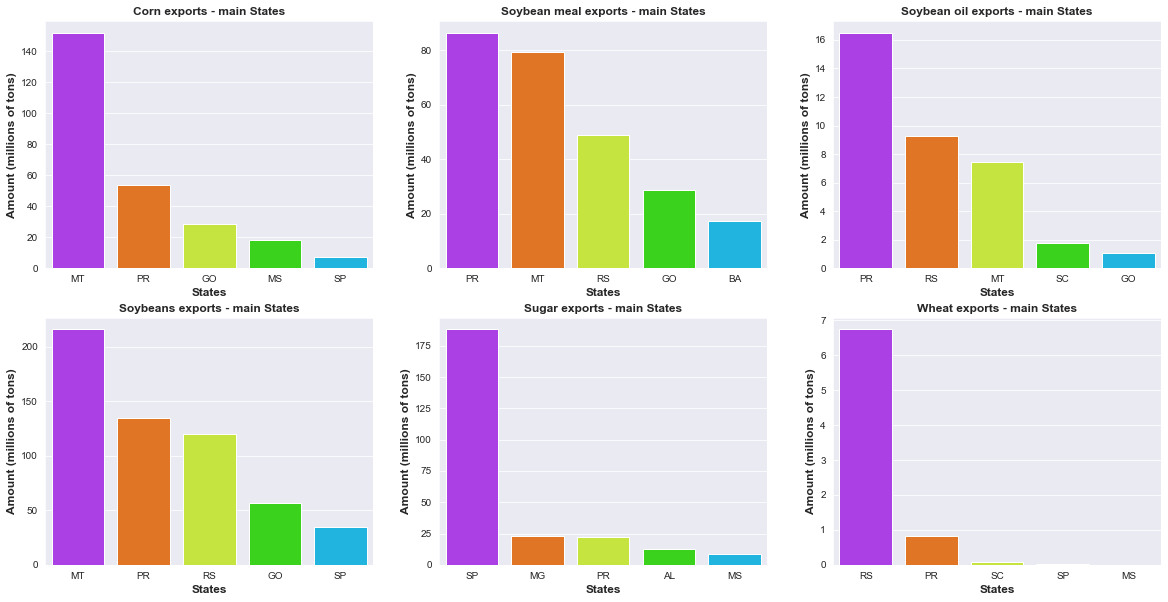

In [136]:
plt.figure(figsize=(20,10))
plt.subplot(2, 3, 1)
sns.barplot(x = exports_corn.index, y = exports_corn['tons']/(10**6), palette = 'gist_ncar_r')
plt.xlabel('States', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Corn exports - main States', fontweight = 'bold')

plt.subplot(2, 3, 2)
sns.barplot(x = exports_soybean_meal.index, y = exports_soybean_meal['tons']/(10**6), palette = 'gist_ncar_r')
plt.xlabel('States', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Soybean meal exports - main States', fontweight = 'bold')

plt.subplot(2, 3, 3)
sns.barplot(x = exports_soybean_oil.index, y = exports_soybean_oil['tons']/(10**6), palette = 'gist_ncar_r')
plt.xlabel('States', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Soybean oil exports - main States', fontweight = 'bold')

plt.subplot(2, 3, 4)
sns.barplot(x = exports_soybeans.index, y = exports_soybeans['tons']/(10**6), palette = 'gist_ncar_r')
plt.xlabel('States', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Soybeans exports - main States', fontweight = 'bold')

plt.subplot(2, 3, 5)
sns.barplot(x = exports_sugar.index, y = exports_sugar['tons']/(10**6), palette = 'gist_ncar_r')
plt.xlabel('States', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Sugar exports - main States', fontweight = 'bold')

plt.subplot(2, 3, 6)
sns.barplot(x = exports_wheat.index, y = exports_wheat['tons']/(10**6), palette = 'gist_ncar_r')
plt.xlabel('States', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Amount (millions of tons)', fontweight = 'bold', fontsize = 12.0)
plt.title('Wheat exports - main States', fontweight = 'bold')

A análise dos gráficos anteriores permite concluir que o estado do **Mato Grosso** tem uma importância muito grande nas exportações brasileiras, especialmente no que se refere ao milho, grãos de soja, farinha e óleo de soja.

Outros estados do Centro Oeste, como Goiás e Mato Grosso do Sul, também se destacam na produção desses e outros produtos, como trigo e açúcar.

**São Paulo** também apresenta grande importância como estado do Sudeste nas exportações brasileiras (principalmente trigo, milho e grãos de soja). A produção canavieira em **Alagoas** também merece destaque, sendo o 4º exportador de açúcar do país.

Por fim, na região Sul, o **Paraná** desponta como principal exportador, com destaque na exportação de todos os produtos avaliados, em especial farinha e óleo de soja.

### 6.

Now, we ask you to show your modelling skills. Feel free to use any type of modelling approach, but bear in mind that the modelling approach depends on the nature of your data, and so different models yield different estimates and forecasts. To help you out in this task we also provide you with a dataset of possible covariates (.xlsx). They all come from public sources (IMF, World Bank) and are presented in index number format. Question: What should be the total brazilian soybeans, soybean_meal, and corn export forecasts, in tons, for the next 11 years (2020-2030)? We’re mostly interested in the annual forecast.

Primeiramente, vamos pegar os dataframes das exportações de soybeans, soybean meal e corn.

In [137]:
exports_soybeans = exports[exports['product']=='soybeans']
exports_soybean_meal = exports[exports['product']=='soybean_meal']
exports_corn = exports[exports['product']=='corn']

Agora, vamos agrupar os dataframes anteriores por ano (e somar):

In [138]:
exports_soybeans_anual = exports_soybeans.groupby(by='year').sum()
exports_soybeans_meal_anual = exports_soybean_meal.groupby(by='year').sum()
exports_corn_anual = exports_corn.groupby('year').sum()

#Vendo como ficou uma delas:

exports_corn_anual

,tons,usd
year,,
1997,3.568950e+05,5.163493e+07
1998,6.033643e+03,1.155060e+07
1999,5.321076e+03,6.806289e+06
2000,5.554756e+03,8.923860e+06
2001,5.410199e+06,4.778679e+08
2002,2.727390e+06,2.654391e+08
2003,3.509735e+06,3.689819e+08
2004,4.892188e+06,5.836593e+08
2005,1.069452e+06,1.207334e+08


Passando um `reset_index` e transformando a coluna `year` criada para formado `datetime` e redefinindo a mesma coluna como índice, teremos:

In [139]:
exports_corn_anual = exports_corn_anual.reset_index()
exports_corn_anual['year'] = pd.to_datetime(exports_corn_anual['year'], format = '%Y')
exports_corn_anual.set_index('year', inplace = True)
exports_corn_anual

exports_soybeans_anual = exports_soybeans_anual.reset_index()
exports_soybeans_anual['year'] = pd.to_datetime(exports_soybeans_anual['year'], format = '%Y')
exports_soybeans_anual.set_index('year', inplace = True)


exports_soybeans_meal_anual = exports_soybeans_meal_anual.reset_index()
exports_soybeans_meal_anual['year'] = pd.to_datetime(exports_soybeans_meal_anual['year'], format = '%Y')
exports_soybeans_meal_anual.set_index('year', inplace = True)

O que será feito a partir de agora é o procedimento análogo aquele desenvolvido no **Case 1**. Primeiramente, como estamos trabalhando com uma série temporal, iremos fazer a avaliação da estacionariedade dos dados pelo teste de Dickey-Fuller, com a função seguinte:

In [140]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determinação das estatísticas móveis:
    
    rolmean = timeseries.rolling(window=5).mean()
    rolstd = timeseries.rolling(window=5).std()
    
    #Plotando:
    
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Média móvel')
    plt.plot(rolstd, color='black', label = 'Std móvel')
    plt.legend(loc='best')
    plt.title('Média e Desvio-padrão móveis')
    plt.show()
    
    #Dickey-Fuller test:
    
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Um teste agora para todas os dataframes criados anteriormente, lembrando de restringir a análise à coluna `tons`:

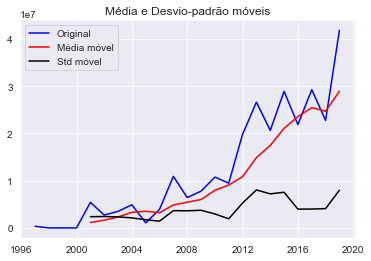

Results of Dickey-Fuller Test:
Test Statistic                 -0.702535
p-value                         0.846092
#Lags Used                      6.000000
Number of Observations Used    16.000000
Critical Value (1%)            -3.924019
Critical Value (5%)            -3.068498
Critical Value (10%)           -2.673893
dtype: float64


In [141]:
test_stationarity(exports_corn_anual['tons'])

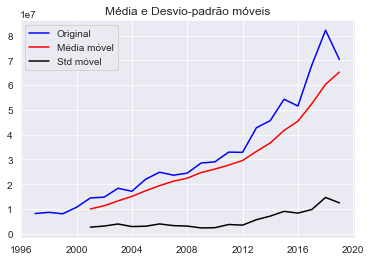

Results of Dickey-Fuller Test:
Test Statistic                  2.898645
p-value                         1.000000
#Lags Used                      3.000000
Number of Observations Used    19.000000
Critical Value (1%)            -3.832603
Critical Value (5%)            -3.031227
Critical Value (10%)           -2.655520
dtype: float64


In [142]:
test_stationarity(exports_soybeans_anual['tons'])

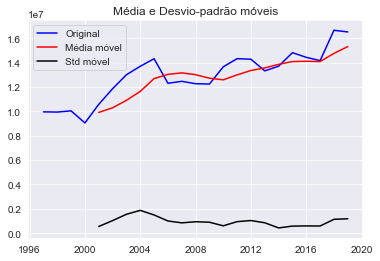

Results of Dickey-Fuller Test:
Test Statistic                 -0.938816
p-value                         0.774921
#Lags Used                      0.000000
Number of Observations Used    22.000000
Critical Value (1%)            -3.769733
Critical Value (5%)            -3.005426
Critical Value (10%)           -2.642501
dtype: float64


In [143]:
test_stationarity(exports_soybeans_meal_anual['tons'])

Os três gráficos anteriores, bem como a análise estatística, nos mostraram que os três conjuntos de dados apresentam séries temporais não estacionárias, uma vez que o valor da estatística do teste é sempre maior que o valor crítico para quaisquer níveis de confiança avaliados (1%, 5% e 10%).

Desse modo, iniciaremos agora a decomposição das séries, para observar a existência ou não de tendências e sazonalidades.

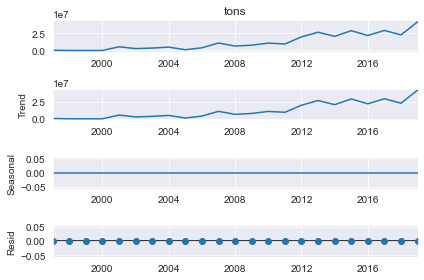

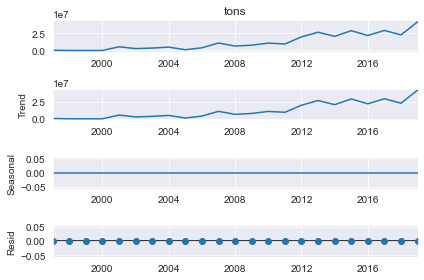

In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_corn = seasonal_decompose(exports_corn_anual['tons'])
trend_corns = decomposition_corn.trend
seasonal_corns = decomposition_corn.seasonal
residual_corns = decomposition_corn.resid

decomposition_corn.plot()

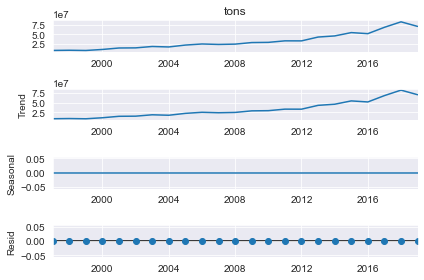

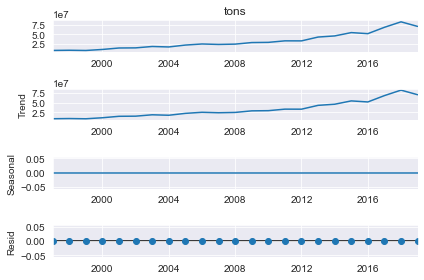

In [146]:
decomposition_soybeans = seasonal_decompose(exports_soybeans_anual['tons'])
trend_soybeans = decomposition_soybeans.trend
seasonal_soybeans = decomposition_soybeans.seasonal
residual_soybeans = decomposition_soybeans.resid

decomposition_soybeans.plot()

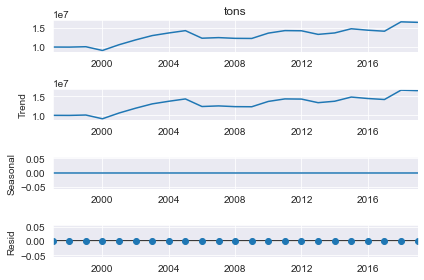

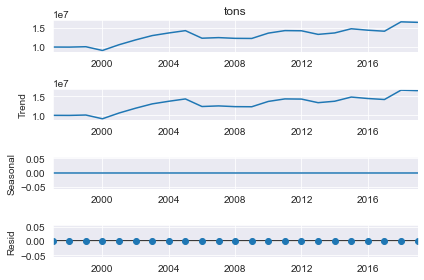

In [148]:
decomposition_soybeans_meal = seasonal_decompose(exports_soybeans_meal_anual['tons'])
trend_soybeans_meal = decomposition_soybeans_meal.trend
seasonal_soybeans_mean = decomposition_soybeans_meal.seasonal
residual_soybeans_mean = decomposition_soybeans_meal.resid

decomposition_soybeans_meal.plot()

A análise de decomposição nos revela que a média móvel não se apresenta constante ao longo do tempo (ou seja, há uma **trend**) para os três conjuntos analisados. Para os mesmos conjuntos, não foi observada nenhuma sazonalidade.

Podemos agora partir para a predição. Usaremos o método *AutoRegressive Integrated Moving Average* **(ARIMA**). O método faz, basicamente, o seguinte:

1. Modela inicialmente através de uma relação entre um valor observado e um determinado número de observações anteriores (Auto Regression);
2. Faz o passo-a-passo anterior de diferenciação para eliminar as componentes que causam a não-estacionariedade dos dados (Integrated);
3. Modela finalmente utilizando a dependência entre um valor observado e o resíduo gerado pela média móvel aplicada à observações anteriores (Moving Average).

Cada um desses componentes é explicitado no modelo através da determinação de **parâmetros**. Como notação padrão, temos `ARIMA(p,d,q)` onde:

* p: número de observações anteriores que serão incluídas no modelo (*lag order*);
* d: número de vezes que as observações serão reduzidas (diferenciadas) para garatir estacionariedade (*grau de diferenciação*);
* q: tamanho da janela no cálculo da média móvel (*moving average order*).

Começando por chamar o modelo e o gráfico de autocorrelação do Pandas:

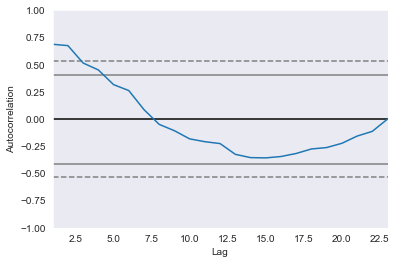

In [149]:
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(exports_corn_anual['tons'])

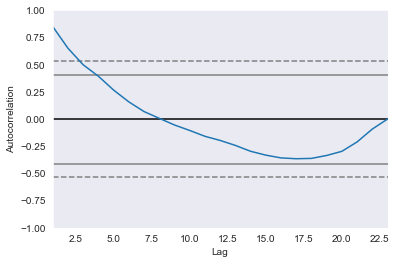

In [150]:
autocorrelation_plot(exports_soybeans_anual['tons'])

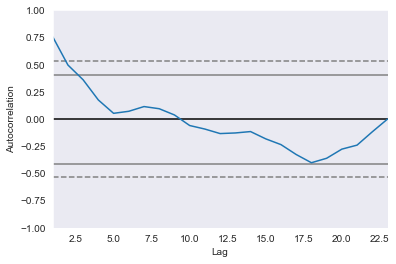

In [151]:
autocorrelation_plot(exports_soybeans_meal_anual['tons'])

Os três gráficos de autocorrelação nos informam qual o lag ideal para se utilizar no modelo ARIMA. Pelo gráfico do dataframe `exports_corn_anual`, verifica-se que até um 'lag' de 7.5, temos correlações positivas. Portanto, podemos supor que é significativo sempre escolher as 5 últimas observações para o primeiro modelo (AutoRegression). Como já vimos não haver influência da sazonalidade, podemos setar a diferenciação apenas para as tendências (variações na média móvel) de maneira que `d=1`. Por fim, para a média móvel, podemos escolher um valor inicial de `q=1` e avaliar a necessidade de mudança posteriormente. 

Esse raciocínio será feito para os outros dois dataframes (`exports_soybeans_anual` e `exports_soybeans_meal_anual`), de maneira que os valores de q e d irão se manter iguais a 1. Já para o valor de p, de acordo com os gráficos de autocorrelação, teremos:

* `exports_soybeans_anual` --> p = 5;
* `exports_soybeans_meal_anual` --> p = 7

Começando a configurar o modelo ARIMA, primeiro para os dados `exports_corn_anual`

In [168]:
model_corn = ARIMA(exports_corn_anual['tons'], order=(5,1,1))
model_corn_fit = model_corn.fit()
model_corn_fit.summary()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   tons   No. Observations:                   23
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -371.413
Date:                Mon, 21 Dec 2020   AIC                            756.827
Time:                        18:43:29   BIC                            764.464
Sample:                    01-01-1997   HQIC                           758.626
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1414      1.287      0.110      0.913      -2.382       2.665
ar.L2          0.6553      1.135      0.577      0.564      -1.569       2.880
ar.L3         -0.0256      0.633     -0.040      0.968      -1.267       1.216
ar.L4          0.1488      0.727      0.205      0.838      -1.276       1.574
ar.L5          0.0138      0.717      0.019      0.985      -1.391       1.419
ma.L1         -0.8396      1.459     -0.576      0.565      -3.699       2.020
sigma2      3.352e+13   6.85e-14   4.89e+26      0.000    3.35e+13    3.35e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                 4.26
Prob(Q):                              0.70   Prob(JB):                         0.12
Heteroskedasticity (H):              10.16   Skew:                             1.08
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.9e+42. Standard errors may be unstable.
"""

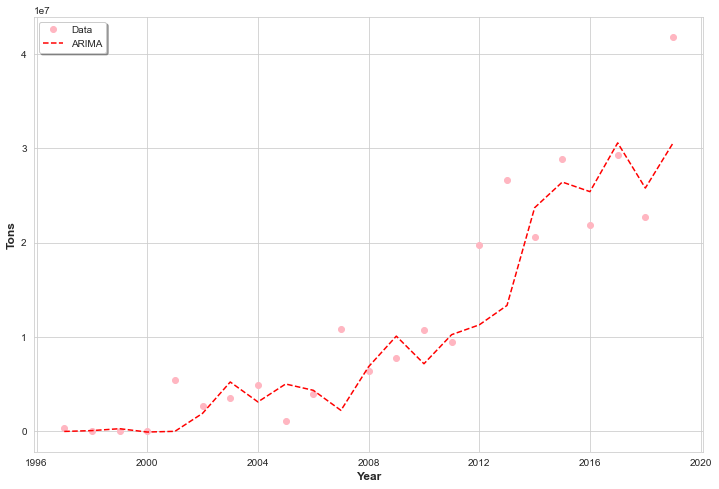

In [169]:
sns.set_style('whitegrid')
plt.subplots(figsize=(12,8))
plt.plot(exports_corn_anual['tons'], 'o', color = 'lightpink', label = 'Data')
plt.plot(model_corn_fit.fittedvalues, linestyle = '--', 
         color = 'red', label = 'ARIMA')
plt.xlabel('Year', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Tons', fontweight = 'bold', fontsize = 12.0)
#plt.ylim([0.6,1.1])
plt.legend(loc='best', shadow = True)

Percebemos que o modelo, aparentemente, ajusta-se apenas de maneira parcial aos dados. Podemos fazer outra análise sobre o ajuste através da distribuição de densidade de probabilidade dos resíduos:

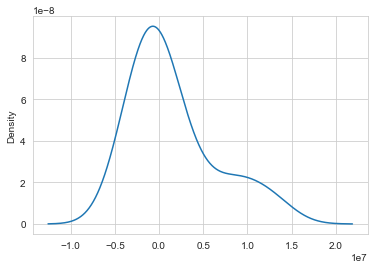

In [170]:
model_corn_fit.resid.plot(kind = 'kde')

A análise dos resíduos confirma o que foi mencionado anteriormente: há uma tendência dos resíduos se situarem entre -0,5 e 1,5, sendo a maior probabilidade em torno de 0,0 (o que é positivo em termos do ajuste do modelo). Entretanto, a grande flutuação dos resíduos mostra que talvez o modelo não seja tão poderoso assim em relação ao ajuste dos dados, sendo necessária a avaliação de outros modelos (ou outras condições).

Outro parâmetro importante no modelo é a função objetivo escolhida (no caso, a **soma do quadrado dos resíduos (RSS)**), definida como:

$ \textrm{RSS} = \sum_{i=1}^{N} (y_{pred} - y_{obs})^2 $

In [173]:
RSS_corn = np.sum(model_corn_fit.resid**2)
print('RSS = %0.4f' % RSS_corn)

RSS = 560965171912863.6250


Prevendo os próximos 11 anos...

In [174]:
corn_forecast = model_corn_fit.forecast(steps = 11)
corn_forecast

2020-01-01    2.967631e+07
2021-01-01    4.163253e+07
2022-01-01    3.400319e+07
2023-01-01    4.382041e+07
2024-01-01    3.835856e+07
2025-01-01    4.582571e+07
2026-01-01    4.208150e+07
2027-01-01    4.794043e+07
2028-01-01    4.544745e+07
2029-01-01    5.006577e+07
2030-01-01    4.848151e+07
Freq: AS-JAN, Name: predicted_mean, dtype: float64

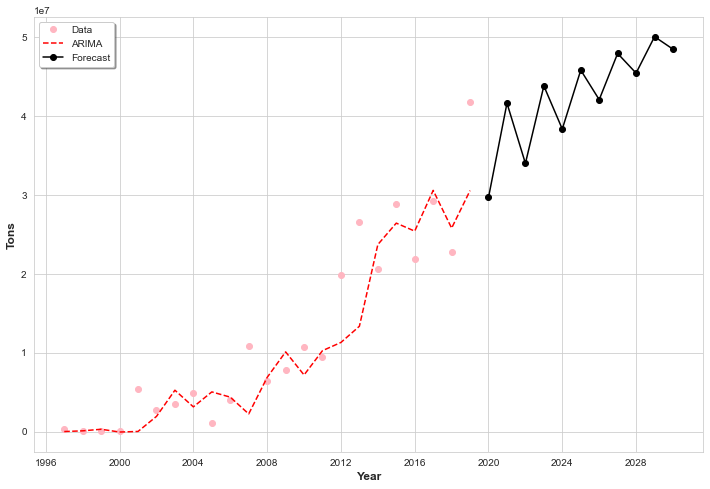

In [176]:
sns.set_style('whitegrid')
plt.subplots(figsize=(12,8))
plt.plot(exports_corn_anual['tons'], 'o', color = 'lightpink', label = 'Data')
plt.plot(model_corn_fit.fittedvalues, linestyle = '--', 
         color = 'red', label = 'ARIMA')
plt.plot(corn_forecast, 'o-', color = 'black', label = 'Forecast')
plt.xlabel('Year', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Tons', fontweight = 'bold', fontsize = 12.0)
#plt.ylim([0.6,1.1])
plt.legend(loc='best', shadow = True)

### Análise para soybeans

In [177]:
model_soybeans = ARIMA(exports_soybeans_anual['tons'], order=(5,1,1))
model_soybeans_fit = model_soybeans.fit()
model_soybeans_fit.summary()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   tons   No. Observations:                   23
Model:                 ARIMA(5, 1, 1)   Log Likelihood                -370.281
Date:                Mon, 21 Dec 2020   AIC                            754.563
Time:                        18:53:49   BIC                            762.200
Sample:                    01-01-1997   HQIC                           756.362
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6074      1.078     -0.564      0.573      -2.720       1.505
ar.L2         -0.2463      0.423     -0.583      0.560      -1.075       0.582
ar.L3          0.5625      0.461      1.220      0.223      -0.341       1.466
ar.L4          0.7231      0.672      1.077      0.282      -0.593       2.040
ar.L5          0.4821      1.052      0.458      0.647      -1.581       2.545
ma.L1          0.0491      1.055      0.047      0.963      -2.019       2.117
sigma2      1.968e+13   2.51e-13   7.84e+25      0.000    1.97e+13    1.97e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                 1.92
Prob(Q):                              0.54   Prob(JB):                         0.38
Heteroskedasticity (H):              17.23   Skew:                             0.71
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.28e+41. Standard errors may be unstable.
"""

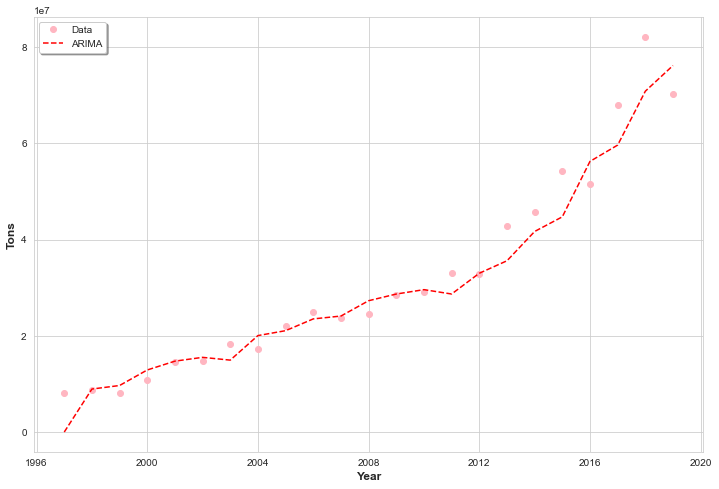

In [178]:
sns.set_style('whitegrid')
plt.subplots(figsize=(12,8))
plt.plot(exports_soybeans_anual['tons'], 'o', color = 'lightpink', label = 'Data')
plt.plot(model_soybeans_fit.fittedvalues, linestyle = '--', 
         color = 'red', label = 'ARIMA')
plt.xlabel('Year', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Tons', fontweight = 'bold', fontsize = 12.0)
#plt.ylim([0.6,1.1])
plt.legend(loc='best', shadow = True)

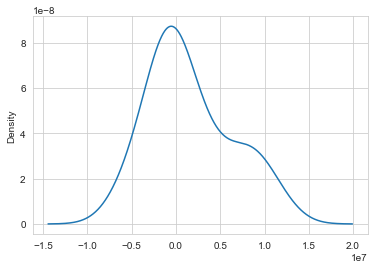

In [179]:
model_soybeans_fit.resid.plot(kind = 'kde')

Enquanto o comportamento dos resíduos para o modelo de soybeans parece muito com o observado para o modelo de corns, o modelo em si parece melhor ajustado aos dados de exportações anuais. Para a soma do quadrado dos resíduos, temos:

In [180]:
RSS_soybeans = np.sum(model_soybeans_fit.resid**2)
print('RSS = %0.4f' % RSS_soybeans)

RSS = 539016874438385.0000


Prevendo os próximos anos e plotando...

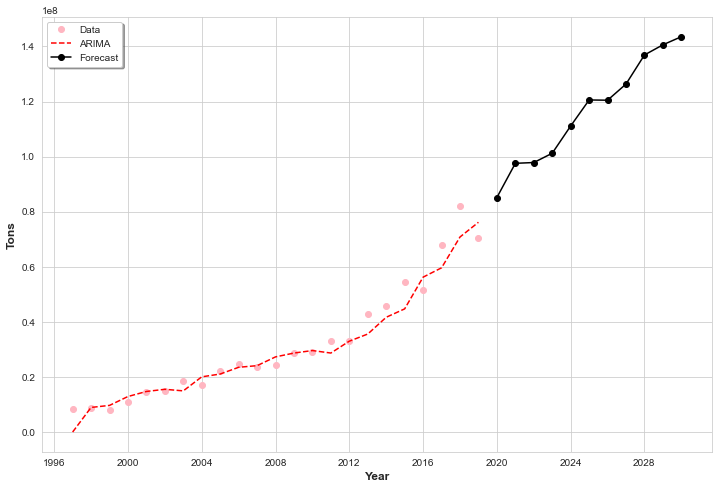

In [181]:
soybeans_forecast = model_soybeans_fit.forecast(steps = 11)

sns.set_style('whitegrid')
plt.subplots(figsize=(12,8))
plt.plot(exports_soybeans_anual['tons'], 'o', color = 'lightpink', label = 'Data')
plt.plot(model_soybeans_fit.fittedvalues, linestyle = '--', 
         color = 'red', label = 'ARIMA')
plt.plot(soybeans_forecast, 'o-', color = 'black', label = 'Forecast')
plt.xlabel('Year', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Tons', fontweight = 'bold', fontsize = 12.0)
#plt.ylim([0.6,1.1])
plt.legend(loc='best', shadow = True)

### Análise para soybeans_meal

In [183]:
model_soybeans_meal = ARIMA(exports_soybeans_meal_anual['tons'], order=(7,1,1))
model_soybeans_meal_fit = model_soybeans_meal.fit()
model_soybeans_meal_fit.summary()

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  % freq, ValueWarning)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:965: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   tons   No. Observations:                   23
Model:                 ARIMA(7, 1, 1)   Log Likelihood                -331.997
Date:                Mon, 21 Dec 2020   AIC                            681.994
Time:                        19:10:21   BIC                            691.814
Sample:                    01-01-1997   HQIC                           684.307
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1977      0.930      0.213      0.832      -1.625       2.020
ar.L2         -0.0267      0.230     -0.116      0.907      -0.477       0.423
ar.L3         -0.0786      0.215     -0.366      0.715      -0.500       0.343
ar.L4          0.1429      0.187      0.765      0.445      -0.223       0.509
ar.L5          0.0397      0.178      0.223      0.823      -0.309       0.388
ar.L6          0.1042      0.345      0.302      0.763      -0.573       0.781
ar.L7          0.1032      0.341      0.302      0.763      -0.566       0.772
ma.L1         -0.2326      0.914     -0.255      0.799      -2.023       1.558
sigma2       7.12e+11   2.11e-12   3.37e+23      0.000    7.12e+11    7.12e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                 3.96
Prob(Q):                              0.60   Prob(JB):                         0.14
Heteroskedasticity (H):              10.71   Skew:                             0.34
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.89e+39. Standard errors may be unstable.
"""

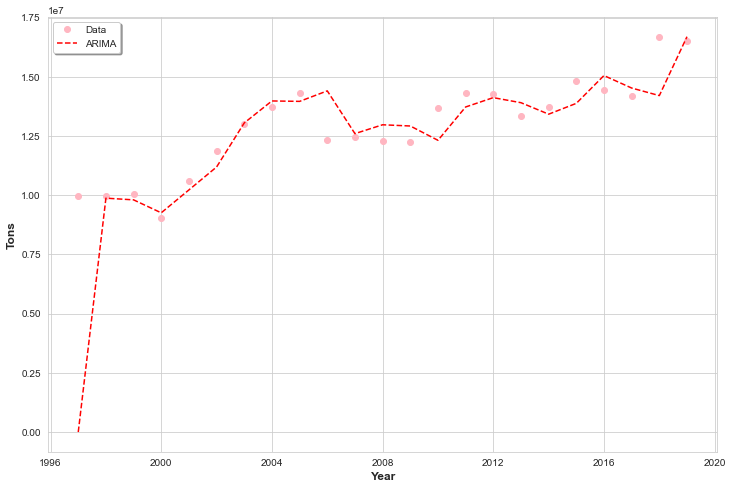

In [184]:
sns.set_style('whitegrid')
plt.subplots(figsize=(12,8))
plt.plot(exports_soybeans_meal_anual['tons'], 'o', color = 'lightpink', label = 'Data')
plt.plot(model_soybeans_meal_fit.fittedvalues, linestyle = '--', 
         color = 'red', label = 'ARIMA')
plt.xlabel('Year', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Tons', fontweight = 'bold', fontsize = 12.0)
#plt.ylim([0.6,1.1])
plt.legend(loc='best', shadow = True)

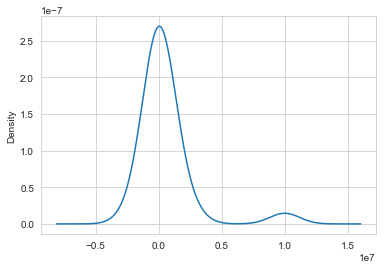

In [185]:
model_soybeans_meal_fit.resid.plot(kind = 'kde')

Aqui, nota-se um modelo muito melhor ajustado, com os resíduos basicamente em torno de zero, garantindo bom ajuste dos dados fornecidos. Em relação a RSS, temos:

In [186]:
RSS_soybeans_meal = np.sum(model_soybeans_meal_fit.resid**2)
print('RSS = %0.4f' % RSS_soybeans_meal)

RSS = 115651496208413.9531


Prevendo os próximos 11 anos e plotando:

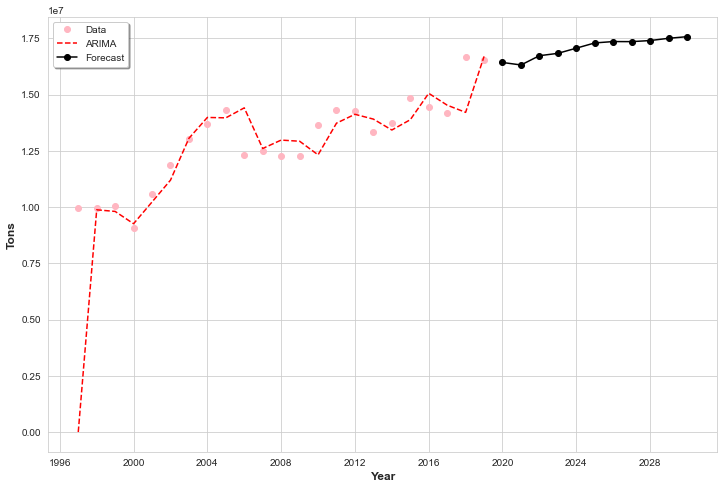

In [187]:
soybeans_meal_forecast = model_soybeans_meal_fit.forecast(steps = 11)

sns.set_style('whitegrid')
plt.subplots(figsize=(12,8))
plt.plot(exports_soybeans_meal_anual['tons'], 'o', color = 'lightpink', label = 'Data')
plt.plot(model_soybeans_meal_fit.fittedvalues, linestyle = '--', 
         color = 'red', label = 'ARIMA')
plt.plot(soybeans_meal_forecast, 'o-', color = 'black', label = 'Forecast')
plt.xlabel('Year', fontweight = 'bold', fontsize = 12.0)
plt.ylabel('Tons', fontweight = 'bold', fontsize = 12.0)
#plt.ylim([0.6,1.1])
plt.legend(loc='best', shadow = True)